In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import cv2
import numpy as np
from models import Yolov4
# from utils import get_detection_data, draw_on_image

/usr/local/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning: Passing (type, 1) or 

In [3]:
model = Yolov4(
#                 weight_path=None,
              weight_path='yolov4.weights',
               img_size=(416, 416, 3),
              )

In [4]:
model.build_model()


Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
all weights read


img shape:  (426, 639, 3)
# of bboxes: 31


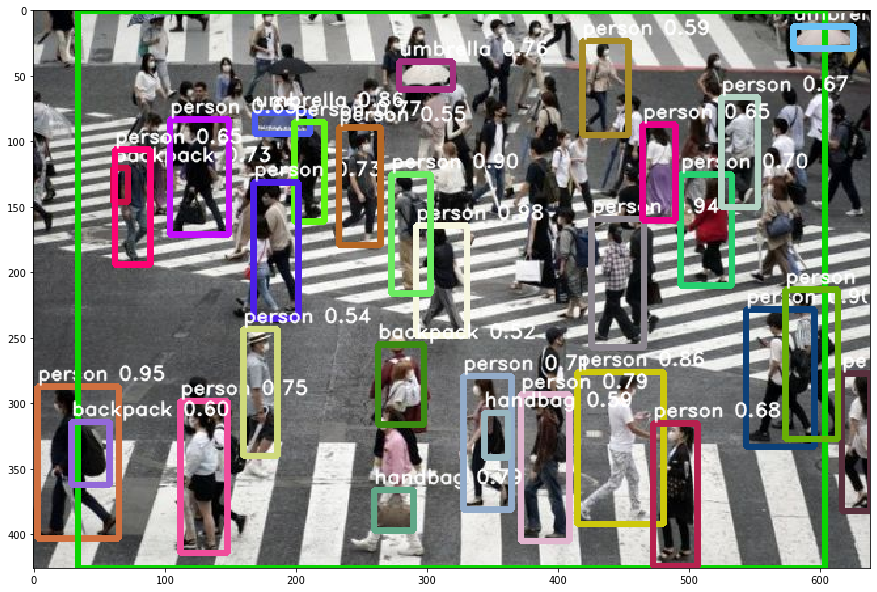

,class_name,x1,y1,x2,y2,score
0,person,292,164,331,248,0.980684
1,person,3,287,65,403,0.954830
2,person,426,159,466,257,0.941540
3,person,273,125,303,216,0.901729
4,person,544,228,596,333,0.897538
5,person,34,0,604,426,0.876581
6,umbrella,169,78,211,94,0.862360
7,person,415,276,481,392,0.861695
8,person,617,277,639,382,0.852280
9,person,372,293,409,405,0.792321


In [25]:
model.predict('test2.jpg')